# Insurance Claim Prediction Using Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Gowtham\Finger tips\All Projects\Python + ML\ML Project - Linear Regression Insurance Prediction\insurance_cost_prediction_data.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [9]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [10]:
#encoding data
df=pd.get_dummies(df,drop_first=True)


In [11]:
df.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [12]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_ss=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_ss.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,-0.953689,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,-0.728675,0.989591,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,0.719843,0.989591,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,-0.776802,0.989591,-0.507463,1.765481,-0.611324,-0.566418


In [13]:
X=df_ss.drop("charges",axis=1)
y=df_ss["charges"]

In [14]:
#random_state Controls the shuffling applied to the data before applying the split.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [15]:
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
428,-1.296362,-2.271753,-0.078767,-1.010519,-0.507463,-0.566418,-0.611324,-0.566418
226,-0.797954,1.213372,-0.908614,0.989591,-0.507463,-0.566418,1.635795,-0.566418
867,1.266881,2.138583,-0.078767,0.989591,-0.507463,-0.566418,-0.611324,1.765481
397,-1.296362,0.058499,-0.908614,0.989591,-0.507463,-0.566418,1.635795,-0.566418
300,-0.228344,-0.510736,1.580926,0.989591,-0.507463,-0.566418,-0.611324,-0.566418


In [16]:
from sklearn.linear_model import LinearRegression
mod=LinearRegression()
mod.fit(X_train,y_train)


LinearRegression()

In [17]:
y_pred=mod.predict(X_test)


C:\Users\chila\AppData\Local\Temp\ipykernel_5752\3603801925.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred),bins=50);


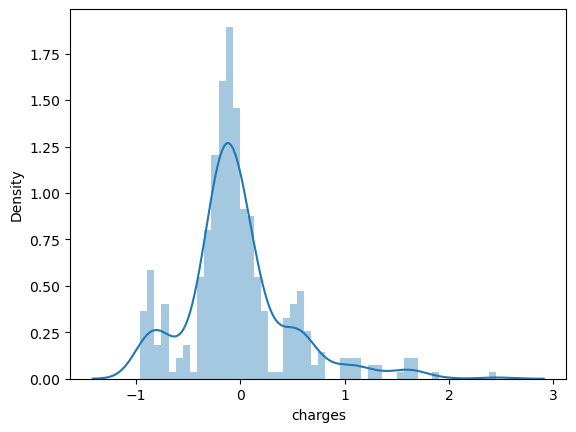

In [18]:
sns.distplot((y_test-y_pred),bins=50);

# Model Evulation

In [19]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error


In [20]:
#mean squre error
print(mean_squared_error(y_test,y_pred))


0.251121967795223


In [21]:
#mean absolute erro
print(mean_absolute_error(y_test,y_pred))

0.3491514526475077


In [22]:
#R2 score
print(r2_score(y_test,y_pred))


0.7166124432331722
